<a href="https://colab.research.google.com/github/desaraju02/Complete-Python-Bootcamp/blob/main/Linear_Regression_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Scatter plot

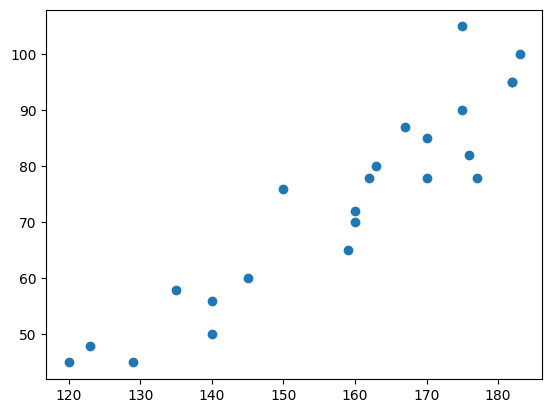

In [6]:
plt.scatter(df['Height'], df['Weight'])

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [11]:
X=df[['Weight']]
type(X)


pandas.core.frame.DataFrame

In [12]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [14]:
y=df['Height']
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(18, 1)

In [17]:
# prompt: perform standardization using standard scaler from sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Apply Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
reg.coef_

array([17.03440872])

In [23]:
reg.intercept_

np.float64(157.5)

### Plot Training data best fit line

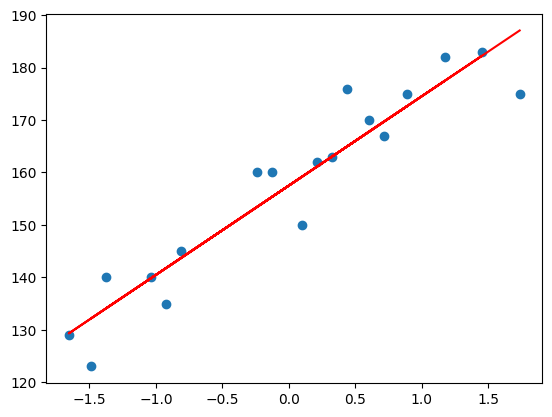

In [27]:
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, reg.predict(X_train_scaled), color='red')

In [28]:
y_pred = reg.predict(X_test_scaled)

### Performance metrics
MSE
MAE
RMSE

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse)
print(mae)
print(rmse)
print(r2)

109.77592599051664
9.822657814519232
10.477400726827081
0.776986986042344


# Adjust r sqaured

In [32]:
# prompt: create adjusted r squared

# Number of observations in the test set
n = X_test_scaled.shape[0]
# Number of features (predictors)
p = X_test_scaled.shape[1]

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adj_r2

0.7026493147231252

### OLS Linear Regression

In [33]:
import statsmodels.api as sm

In [34]:
model = sm.OLS(y_train, X_train_scaled).fit()

In [35]:
y_pred_ols = model.predict(X_test_scaled)
y_pred_ols

array([  3.58467086,   3.58467086, -28.1958439 ,  19.95645118,
        -8.93492586])

In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Tue, 20 May 2025   Prob (F-statistic):                       0.661
Time:                        09:32:35   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Prediction for new data

In [39]:
reg.predict(scaler.transform([[72]]))

array([157.5])